## <span style="color:blue">DATA SCIENCE PROJECT BY TOKUN OLANREWAJU</span>


# About The Data
| Column Name          | Column Type   | Column Description                                            |
|----------------------|---------------|---------------------------------------------------------------|
| State                | String        | The state where a customer comes from                         |
| Account length       | Integer       | Number of days a customer has been using services            |
| Area code            | Integer       | The area where a customer comes from                          |
| Phone number         | Alphanumeric  | The phone number of a customer                                |
| International plan   | String        | The status of customer international plan                     |
| Voicemail plan       | String        | The status of customer voicemail plan                         |
| No. vmail msgs       | Integer       | Number of voicemail messages sent by a customer               |
| Total day minutes    | Float         | Total call minutes spent by a customer during daytime         |
| Total day calls      | Integer       | Total number of calls made by a customer during daytime       |
| Total day charge     | Float         | Total amount charged to a customer during daytime             |
| Total eve minutes    | Float         | Total call minutes spent by a customer during evening time    |
| Total eve calls      | Integer       | Total number of calls made by a customer during evening time  |
| Total eve charge     | Float         | Total amount charged to a customer during evening time        |
| Total night minutes  | Float         | Total call minutes spent by a customer during nighttime       |
| Total night calls    | Integer       | Total number of calls made by a customer during nighttime     |
| Total night charge   | Float         | Total amount charged to a customer during nighttime           |
| Total intl minutes   | Float         | Total international call minutes spent by a customer          |
| Total intl calls     | Integer       | Total number of international calls made by a customer        |
| Total int charge     | Float         | Total international call amount charged to a customer         |
| Customer service calls | Integer     | Total number of customer service calls made by a customer     |
| Churn                | Boolean       | Whether a customer is churned or not                          |


### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)





# Load Data

In [2]:
# I ma going to represent the data as df
df= pd.read_csv("C:\\Users\\USER\\Documents\\Data Science Challenge.csv")

In [3]:
# viewing th first 5 rows of the data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# EDA Data Cleaning

In [4]:
# Knowing the qualities and data type of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# I want to show the number of rows and columns of the data
# we see that the data has 3333 rows and 21 columns
print("The shape of the data is ({}, {})".format(*df.shape))
print('columns of data set = {}'.format(df.columns))

The shape of the data is (3333, 21)
columns of data set = Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [6]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [8]:
# To check if we have null values and from the data we have no null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
# No duplicated value as well
df.duplicated().sum()

0

In [10]:
Categorical=df.select_dtypes(include='object').columns.tolist()
Categorical


['state', 'phone number', 'international plan', 'voice mail plan']

In [11]:
numerical=df.select_dtypes(include='number').columns.tolist()
numerical

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [12]:
# lets get to know the column to drop. Data type object which has a lot of disitnct objects wiil be dropped
df.describe( include = 'object').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


In [ ]:
df.drop(columns=['phone number'], inplace=True)

In [15]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [16]:
df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [17]:
df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [18]:
df.select_dtypes('number').nunique()

account length             212
area code                    3
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
dtype: int64

lets show the correleation of the feature with the target variable

In [20]:
plan_grp=df.groupby(['international plan' ,'churn']).size().reset_index(name='count')

In [21]:
plan_grp

,international plan,churn,count
0,no,False,2664
1,no,True,346
2,yes,False,186
3,yes,True,137


In [26]:
plan_grp=df.groupby(['voice mail plan' ,'churn']).size().reset_index(name='count')
plan_grp

,voice mail plan,churn,count
0,no,False,2008
1,no,True,403
2,yes,False,842
3,yes,True,80


In [27]:
plan_grp=df.groupby(['area code' ,'churn']).size().reset_index(name='count')
plan_grp

,area code,churn,count
0,408,False,716
1,408,True,122
2,415,False,1419
3,415,True,236
4,510,False,715
5,510,True,125


# VISUALIZATION

#### Visualizing Object Datatype


[Text(0, 0, 'False'), Text(1, 0, 'True')]

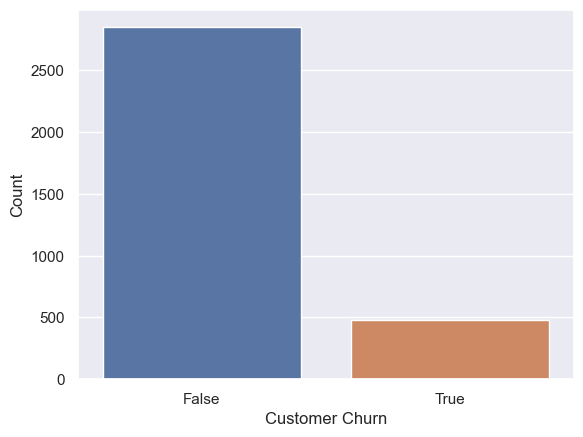

In [22]:
# Select theme for seaborn and the target variable 
sns.set_theme()
target_variable = "churn"

# Plot target variable
count_churn_plot = sns.countplot(data =df, x = target_variable)
count_churn_plot.set_ylabel("Count")
count_churn_plot.set_xlabel("Customer Churn")
count_churn_plot.set_xticklabels(["False", "True"])

<Axes: xlabel='voice mail plan', ylabel='count'>

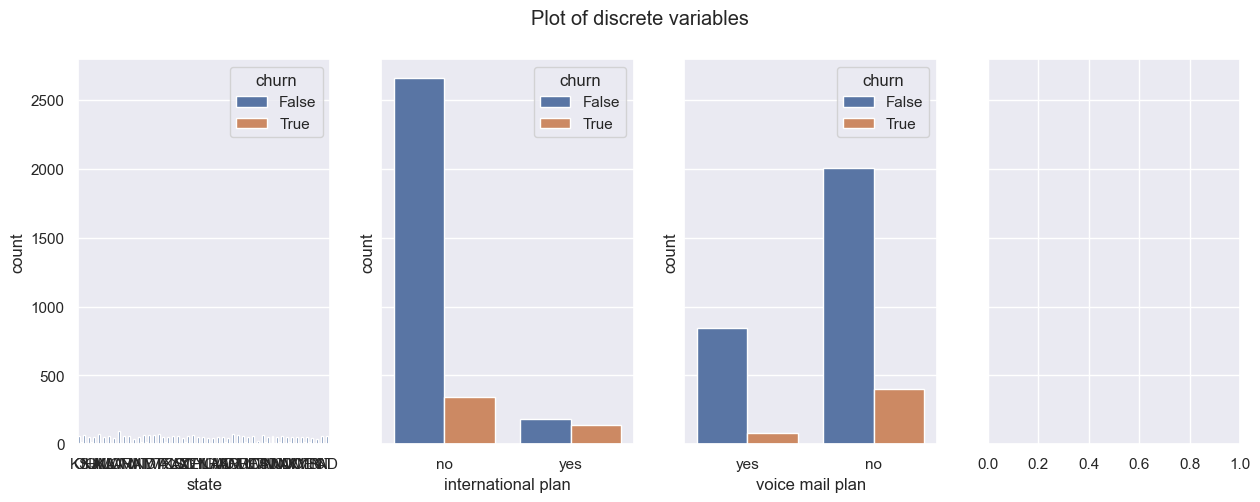

In [23]:
# Visualize in subplots the distribution of the variables
fig2, axes2 = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig2.suptitle('Plot of discrete variables')
# Countplots of other variables
sns.countplot(ax=axes2[0], data = df, x = "state", hue='churn')
sns.countplot(ax=axes2[1], data = df, x = "international plan", hue='churn')
sns.countplot(ax=axes2[2], data =df, x = "voice mail plan", hue='churn')

In [25]:
df1 =df.drop(['state','international plan','voice mail plan'],axis=1)

All the numerical columns are symmetrical except for the number vmail messages which is skewed to the right


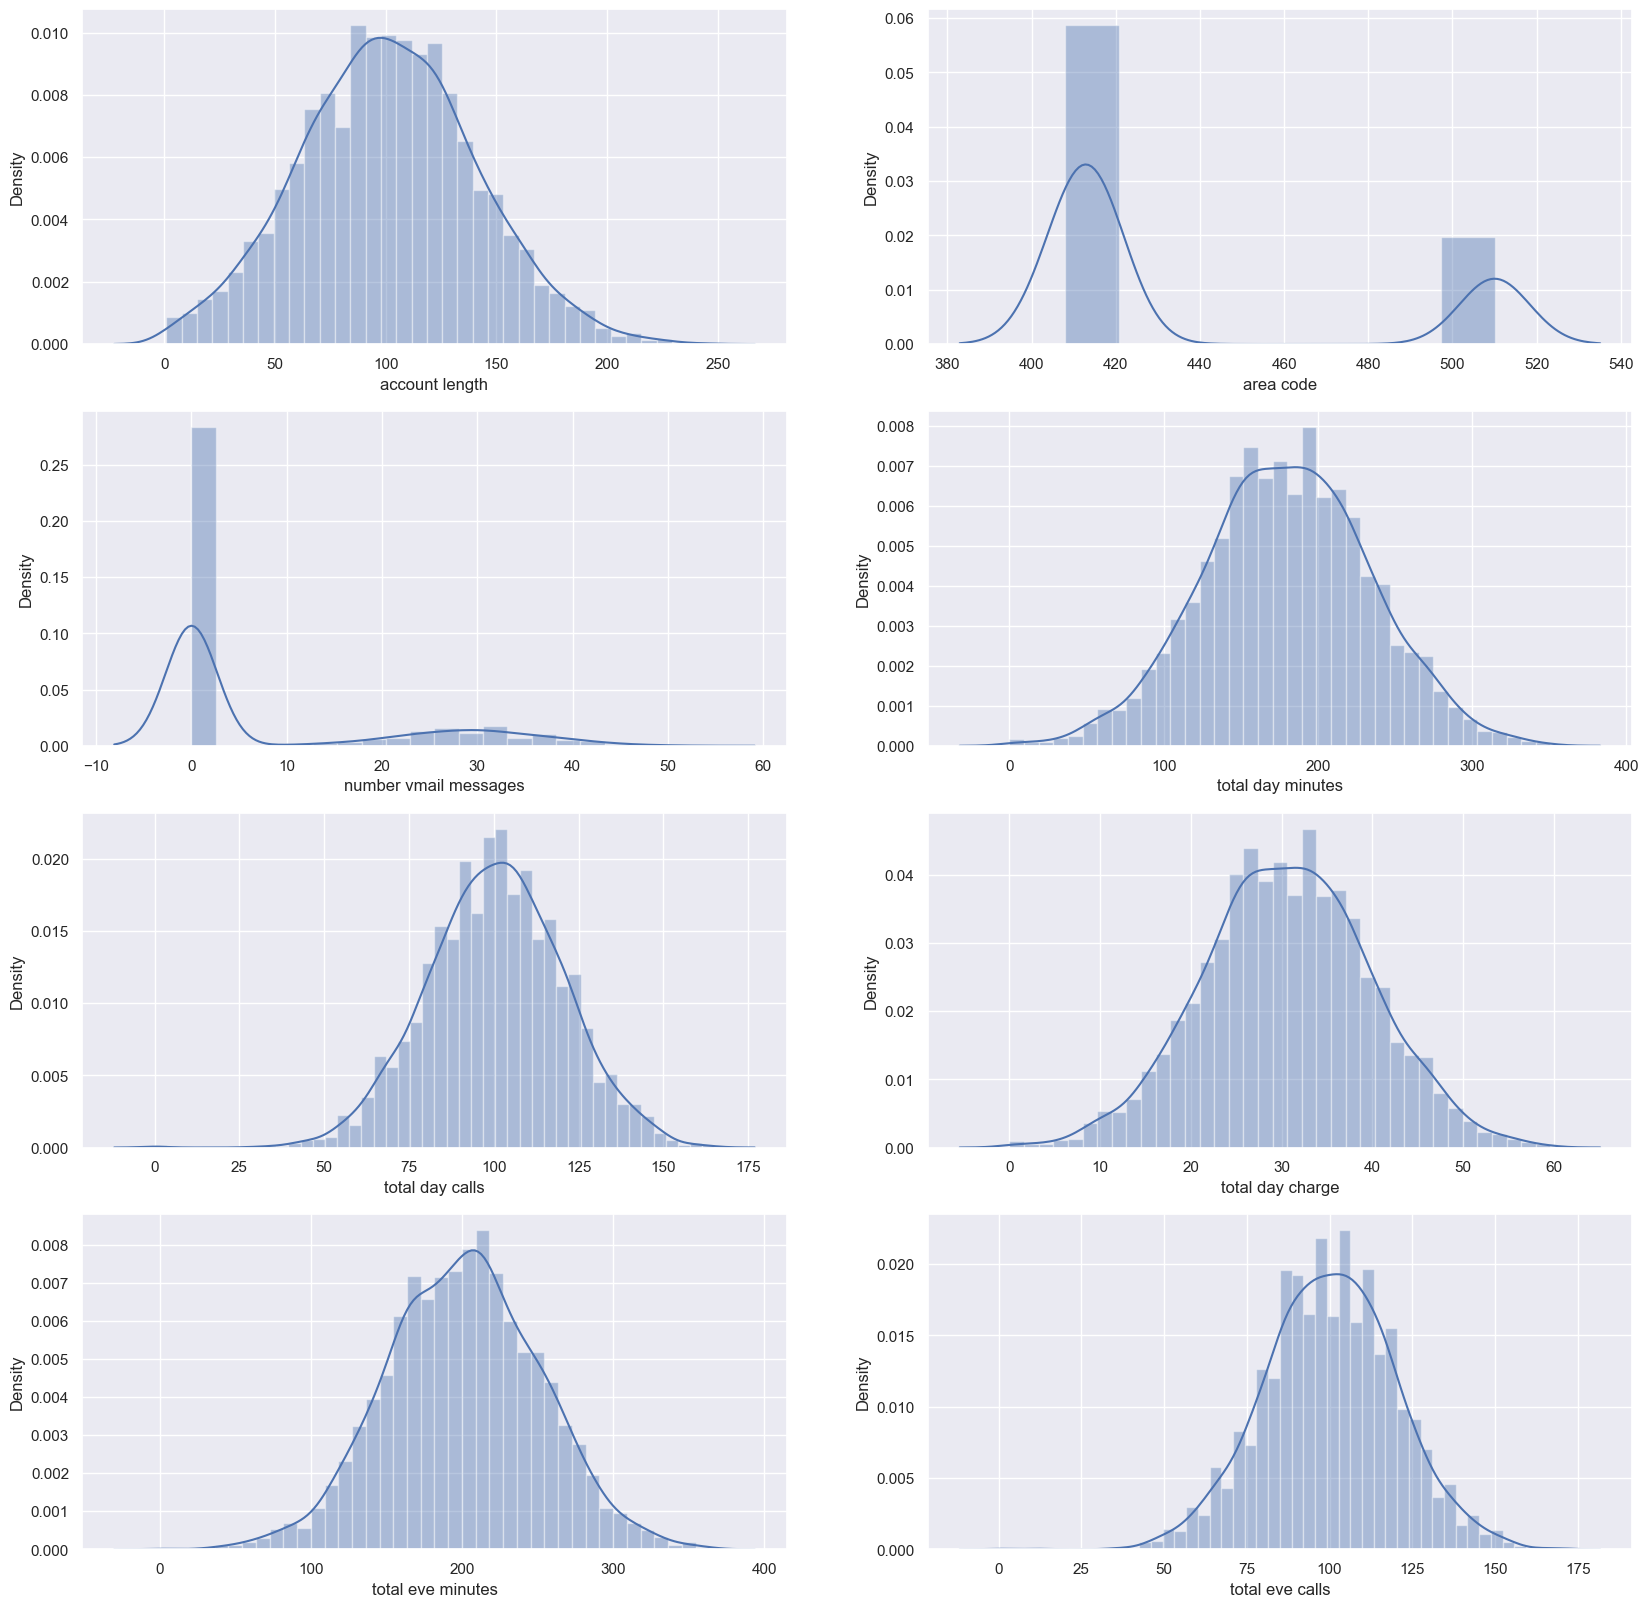

In [39]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(20,20)

for ax, col in zip(axes,df1.columns):
  sns.distplot(df[col], ax = ax)
print('All the numerical columns are symmetrical except for the number vmail messages which is skewed to the right')

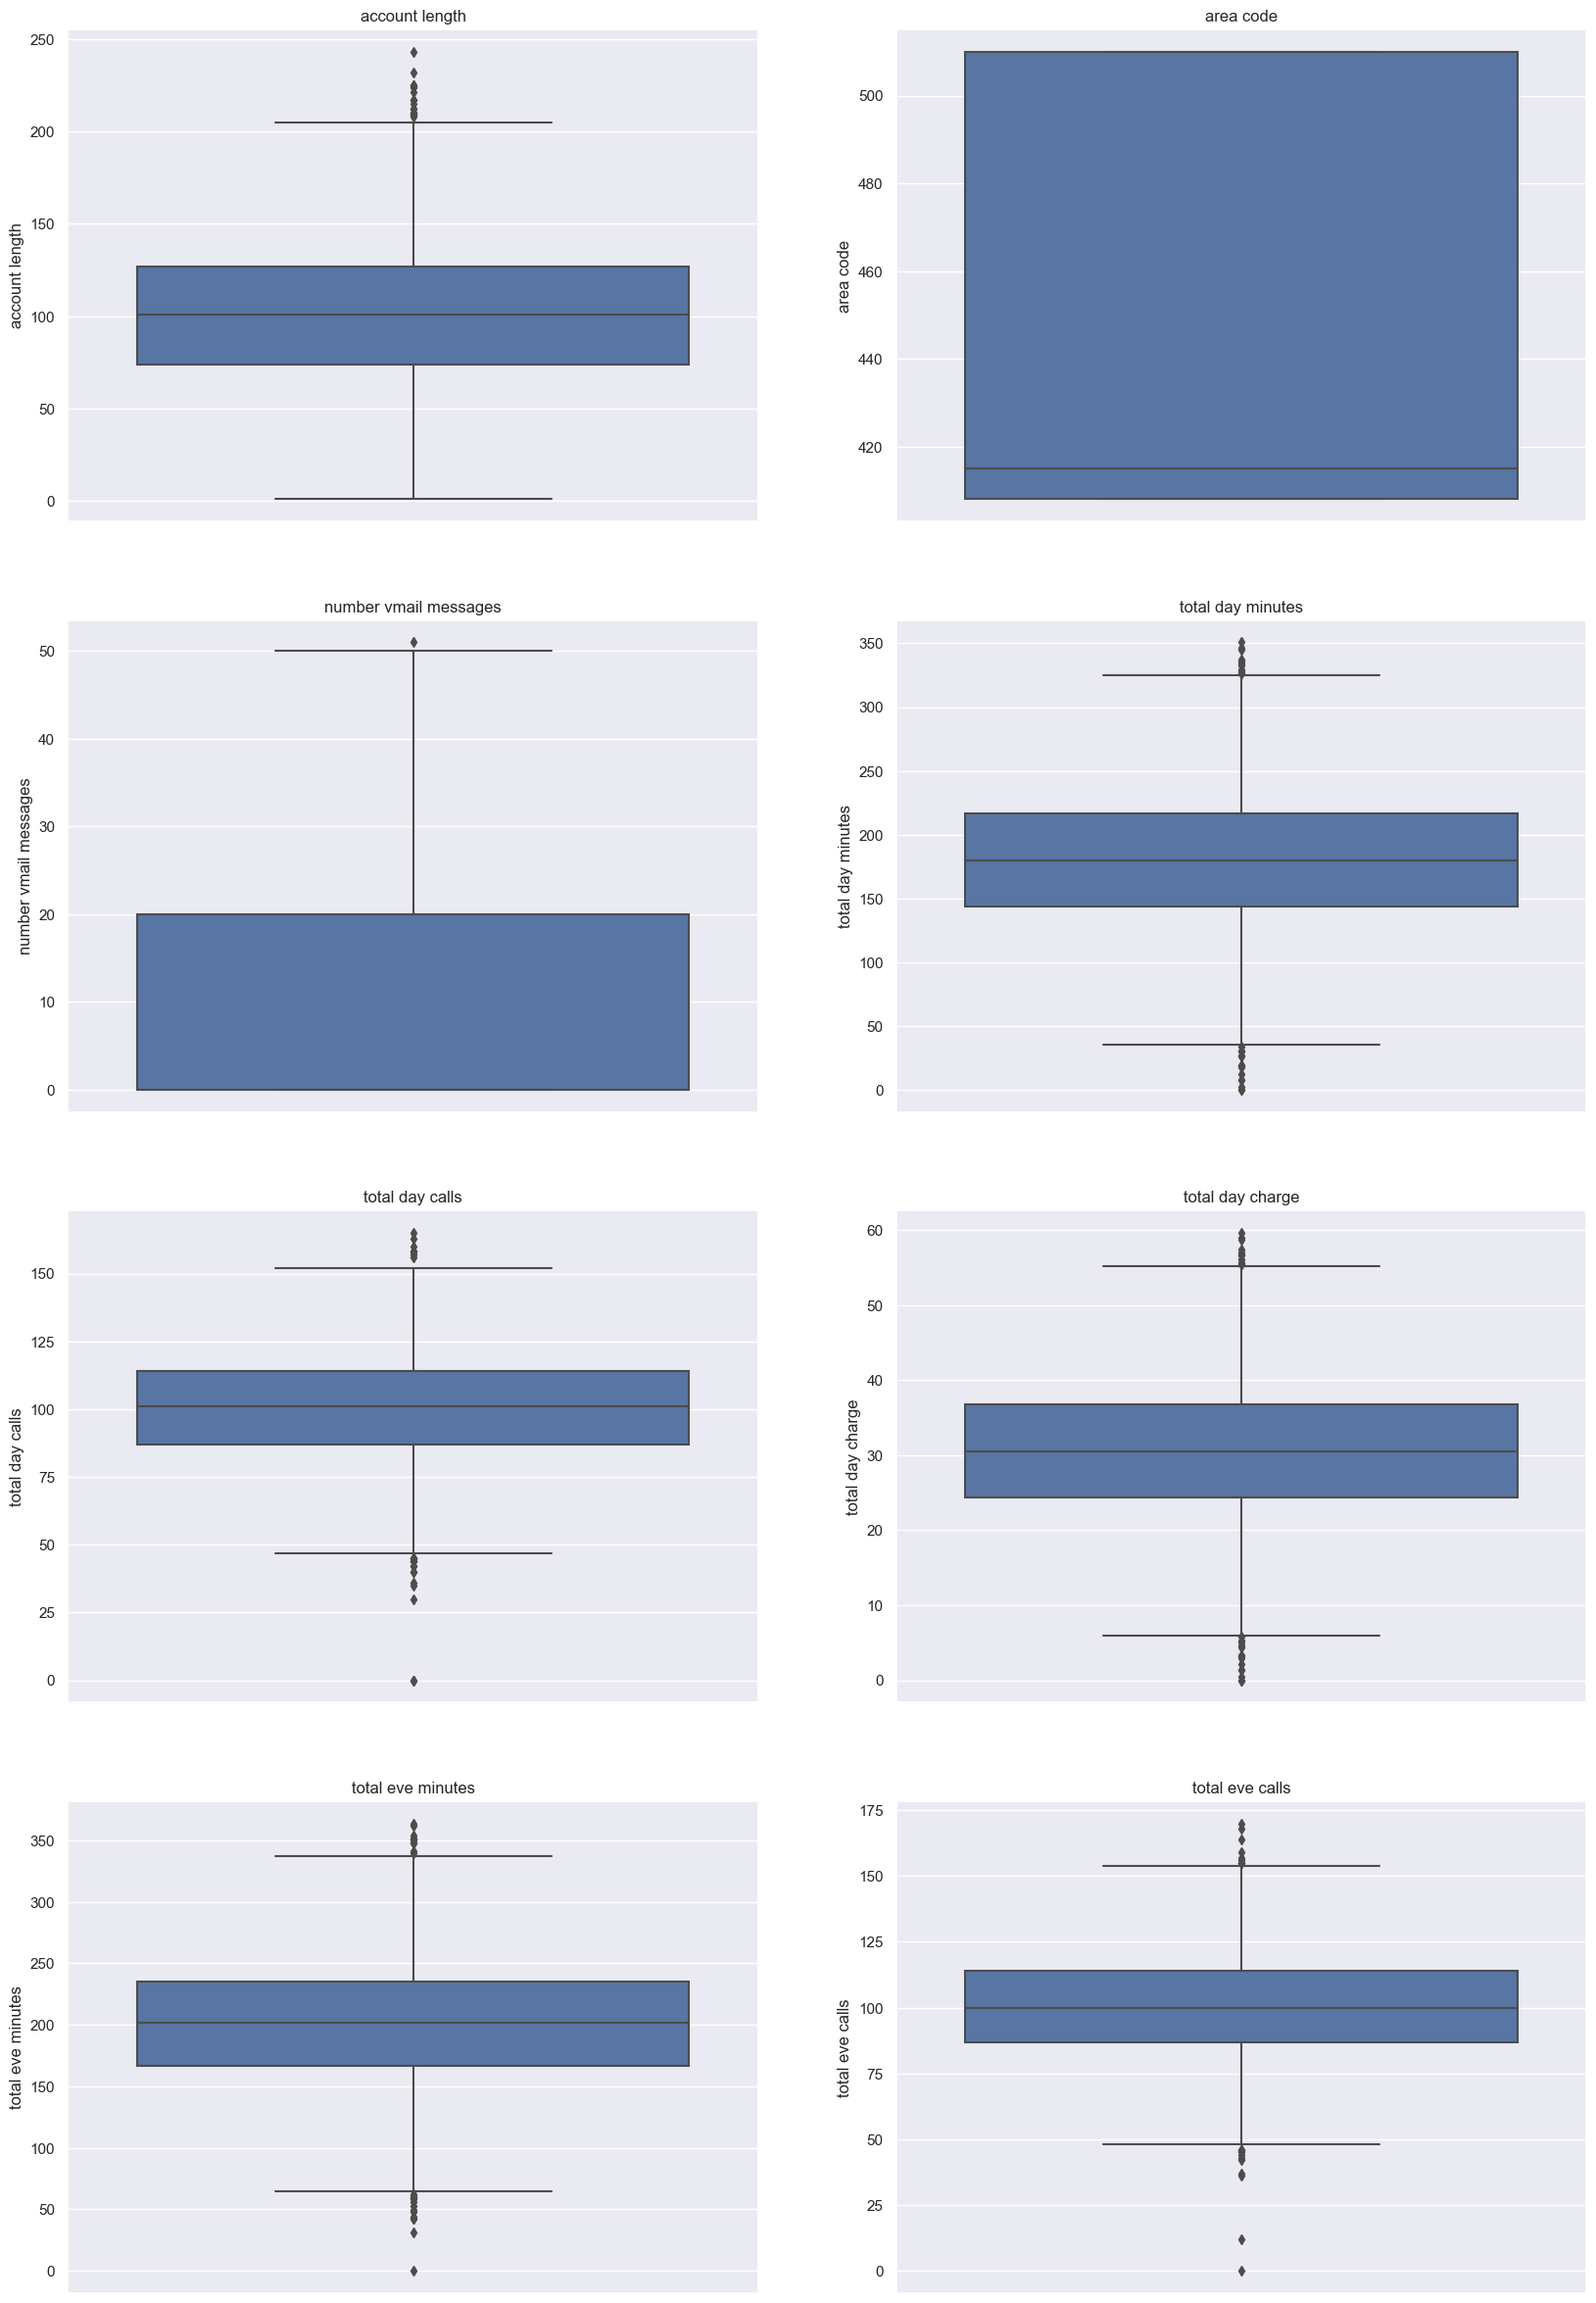

In [26]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(20,30)

for ax, col in zip(axes,df1.columns):
  sns.boxplot(y=df1[col], hue='churn', ax = ax , data=df1)
  ax.set_title(col)

# Data Preprocessing

In [27]:
from sklearn.preprocessing import LabelEncoder
# coverting our categorical data to numbers
df['international plan'] = LabelEncoder().fit_transform(df['international plan'])
df['voice mail plan'] = LabelEncoder().fit_transform(df['voice mail plan'])
df['state'] = LabelEncoder().fit_transform(df['state'])
df['churn'] = LabelEncoder().fit_transform(df['churn'])

In [28]:
df.dtypes

state                       int32
account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [30]:
# lets Calculate correlation coefficients
correlation_matrix = df.corr()
correlation_matrix

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


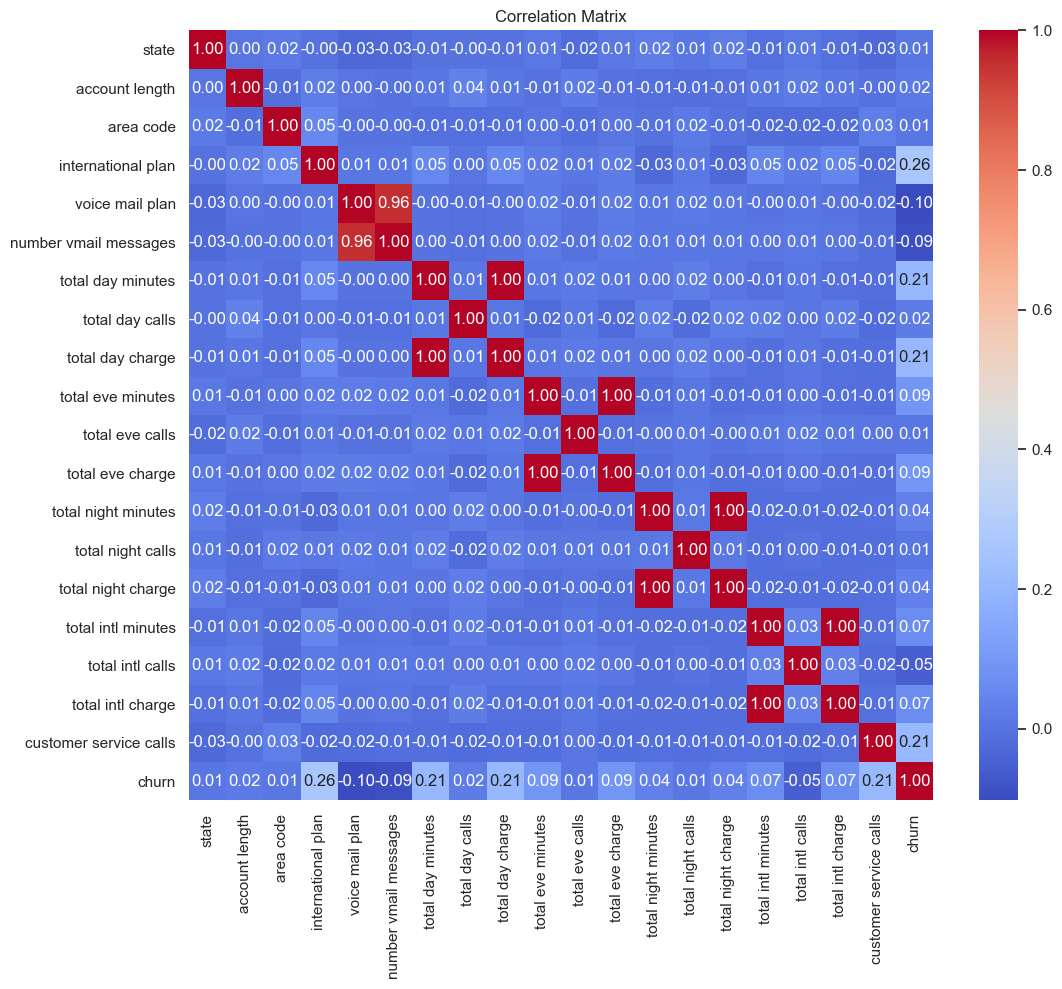

In [31]:
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [32]:
X=df.drop(['churn'],axis=1)
y=df['churn']

## Test/Train 

After the preliminary EDA, it is time to prepare the dataset for using ML models to classify the users as churn or not churn. We will use scikit-learn and its different modules to create the train and test sets and to implement the different machine learning models.

Initially, we will use the dataset as is without dealing with the balance of the data. We will use stratify to ensure the model has a similar balance of churn in the train set than in the test set.


In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2666, 19) (2666,)
Test set: (667, 19) (667,)


## Model Prediction and Evaluation
I am going to use different machine learning algorithms for model prediction.
To reduce overfitting so as the data to perform well on unseen data, I will use cross validation and Gridsearch

In [35]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree":DecisionTreeClassifier()
}

# Initialize dictionaries to store results
train_scores = {}
cv_scores = {}

# Create a KFold object for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Compute train score and cross-validation score for each classifier
for name, clf in models.items():
    # Fit classifier to training data
    clf.fit(X, y)
    
    # Evaluate train score
    train_score = clf.score(X, y)
    train_scores[name] = train_score
    
    # Evaluate cross-validation score
    cv_score = np.mean(cross_val_score(clf, X, y, cv=kf))
    cv_scores[name] = cv_score
    # Initialize dictionaries to store results
train_scores = {}
cv_scores = {}

# Compute train score and cross-validation score for each classifier
for name, clf in models.items():
    # Fit classifier to training data
    clf.fit(X, y)
    
    # Evaluate train score
    train_score = clf.score(X, y)
    train_scores[name] = train_score
    
    # Evaluate cross-validation score
    cv_score = np.mean(cross_val_score(clf, X, y, cv=kf))
    cv_scores[name] = cv_score

# Find the classifier with the highest cross-validation score
best_model = max(cv_scores, key=cv_scores.get)
best_cv_score = cv_scores[best_model]


# Print train and cross-validation scores for each classifier
for name in models.keys():
    print(f"{name}: Train score: {train_scores[name]:.4f}, CV score: {cv_scores[name]:.4f}")
print(f"Best Model: {best_model}")
print(f"Cross-validation score: {best_cv_score:.4f}")


Logistic Regression: Train score: 0.8566, CV score: 0.8560
K-Nearest Neighbors: Train score: 0.8950, CV score: 0.8722
Random Forest: Train score: 1.0000, CV score: 0.9535
Gradient Boosting: Train score: 0.9715, CV score: 0.9511
Support Vector Machine: Train score: 0.8551, CV score: 0.8551
AdaBoost: Train score: 0.8923, CV score: 0.8779
Decision Tree: Train score: 1.0000, CV score: 0.9148
Best Model: Random Forest
Cross-validation score: 0.9535


#### Here the accuracy of both the Random forest and  Gradient Boosting are close. So lets use hyperparameter to improve our model 
### using GridSearchcv and choose our best model

## Lets us Gridsearchcv to improve our model

* Seeing the difference between the train score and the test cv score, it shows that our data is not overfitting using cross validation. Cross validation helps to reduce the issue of overfitting.

### Random Forest

In [36]:
# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a GridSearchCV object with the Random Forest classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Print the best score found by GridSearchCV
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9553667671508176


### Gradient Boosting

In [37]:

# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Create a GridSearchCV object with the Gradient Boosting classifier and parameter grid
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Print the best score found by GridSearchCV
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.9568634891189014


In [38]:
# Print the best score found by GridSearchCV
print(f"Best Score: {grid_search.best_score_:.4f}")


Best Score: 0.9569


## Gradient Boosting is the Best Classifier because it has the highest cross validation score with over 95.6% accuracy
Lets find the Classification report of the Best model

In [40]:
GB= GradientBoostingClassifier()
GB.fit(X_train, y_train)

# Predict on the test data using the best model
y_pred = GB.predict(X_test)

# Generate and print the classification report for the best model
report = classification_report(y_test, y_pred)
print(f"classification Report for {'Gradient Boosting'}:")
print(report)

classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.93      0.73      0.82       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. In this report:
- For class 0 (customers who did not churn), the precision is 0.95, indicating that 95% of the customers predicted as not churning actually did not churn.
- For class 1 (customers who churned), the precision is 0.93, meaning that 93% of the customers predicted as churning actually did churn.

Recall (Sensitivity): Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. In this report:
- For class 0, the recall is 0.99, indicating that 99% of the customers who did not churn were correctly identified by the model.
- For class 1, the recall is 0.73, meaning that 73% of the customers who churned were correctly identified by the model.

F1-Score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. In this report:
- For class 0, the F1-score is 0.97, which is high and indicates a good balance between precision and recall.
- For class 1, the F1-score is 0.82, indicating a reasonably good balance between precision and recall, but it's slightly lower compared to class 0.

Support: Support represents the number of actual occurrences of each class in the dataset. In this report:
- There are 566 instances of class 0 (customers who did not churn).
- There are 101 instances of class 1 (customers who churned).

Accuracy: Accuracy measures the proportion of correctly classified instances among all instances in the dataset. In this report, the overall accuracy of the model is 0.95, indicating that 95% of the predictions made by the model are correct.

Macro Average and Weighted Average: The macro average calculates the metrics independently for each class and then takes the unweighted average of the scores. The weighted average, on the other hand, calculates the metrics for each class and takes the weighted average based on the number of instances of each class. In this report:
- The macro average precision, recall, and F1-score are all high, indicating good overall performance across both classes.
- The weighted average precision, recall, and F1-score are also high, reflecting the performance of the model while considering the class imbalance in the dataset.

Hence, this classification report suggests that the Gradient Boosting model performs well in predicting customer churn, with high precision, recall, and accuracy. However, we can still improve on this, especially for  recall of class 1 (churned customers), as it's relatively lower compared to class 0 (non-churned customers).


### The potential issues that may occur with deploying the model are
-  Imbalance class: The dataset may suffer from class imbalance.The model may have a high accuracy but may perform poorly in predicting the minority class (churned customers). This can lead to biased predictions and inaccurate insights.
- Performance Issues: The precision, recall, and F1-score for class 1 (churned customers) are lower compared to class 0 (non-churned customers). While the model performs well in identifying non-churned customers, it may struggle with correctly identifying churned customers. This discrepancy can have significant implications in real-world scenarios, as misclassifying churned customers may result in missed opportunities for retention efforts or inaccurate business decisions.
- Generalization to New Data: The reported performance metrics are based on evaluation on a specific type of dataset. There is a risk that the model may not generalize well to new, unseen data in production environments. Factors such as changes in customer behavior may impact the model's performance over time.
- Gradient Boosting models can be computationally expensive, especially when dealing with large datasets or real-time prediction scenarios. Deploying such models into production may require adequate computational resources and infrastructure to ensure timely and efficient predictions without compromising performance.

## Question 3: Design Experiment

`a) **Establish the primary objective of the experiment and create metrics for performance measurement:**

   Objective: I have to Reduce customer churn rate by implementing targeted interventions based on the predictive model's insights.
  The  Metrics to be used are:
   - Churn rate: To know The percentage of customers who leave the service within a specific time frame.
   - Retention rate: The percentage of customers who remain with the service within the same time frame.
   - Precision, recall, and F1-score: Performance metrics from the classification report to evaluate the model's ability to predict churn accurately.
   - Return on Investment (ROI)

b) **Create null hypothesis and alternative hypothesis and discuss corresponding statistics:**

   Null hypothesis (H0): There is no significant difference in churn rate between the control group (no intervention) and the treatment group (intervention based on predictive model).
   Alternative hypothesis (H1): There is a significant difference in churn rate between the control group and the treatment group.
   Statistics:
   - Conduct a hypothesis test (e.g., chi-square test) to compare churn rates between the control and treatment groups.
   - Use p-value to determine the significance of the observed difference.

c) **Discuss how you setup the control and treatment group and overall experiment workflow:**

   Control group: Customers who receive no intervention and continue with standard service.
   Treatment group: Customers identified by the predictive model as at-risk of churning receive targeted interventions (e.g., personalized offers, loyalty rewards, proactive customer support).
   Experiment workflow:
   1. Segment customers into control and treatment groups based on model predictions.
   2. Implement interventions for the treatment group while maintaining standard service for the control group.
   3. Monitor churn rates in both groups over a defined period.
   4. Analyze the results to assess the effectiveness of the interventions.

d) **Explain the risks of the experiment and how to mitigate the risks:**

   Risks:
   - Inaccurate predictions: The predictive model may misclassify customers, leading to ineffective interventions.
   - Unintended consequences: Interventions could have unforeseen effects on customer behavior or satisfaction.
   Mitigation strategies:
   - Continuously evaluate and refine the predictive model to improve accuracy and reduce false predictions.
   - Conduct A/B testing to pilot interventions on a small scale before implementing them broadly.
   - Monitor customer feedback and behavior to identify any negative impacts of interventions early and make adjustments as needed.

By following this plan, you can systematically test the effectiveness of interventions aimed at reducing customer churn based on insights from the predictive model.
